## Introduction:

#### Context:

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had

#### Content:
This dataset contains the LEGO Parts/Sets/Colors and Inventories of every official LEGO set in the Rebrickable database. These files are current as of July 2017.

#### Acknowledgements:
This dataset was compiled by Rebrickable, which is a website to help identify what LEGO sets can be built given bricks and pieces from other LEGO sets and made available on Kaggle at the following [link](https://www.kaggle.com/datasets/rtatman/lego-database). 

#### Dataset Description:

The dataset contains 8 tables that are linked to each other through one or more relationships per the following schema:

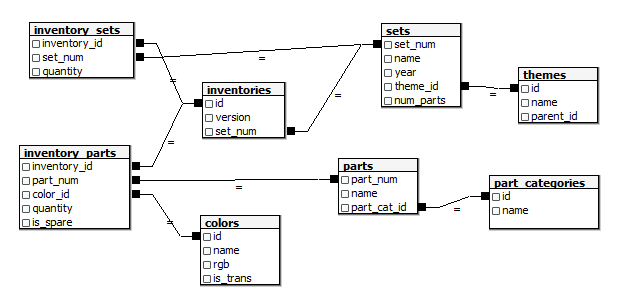



## Data Import:

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
parts_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/parts.csv')
inv_parts_df = pd.read_csv('../5. Python - pandas - Data Manipulation/data/inventory_parts.csv')

## Data Exploration:

Parts Analysis:
1. What are the top 10 most stocked parts in the parts inventory?
2. How many colors are there across all LEGO parts?
3. What are the top 5 most stocked colors in the parts inventory?
4. What is the distribution of part categories in the dataset?

### Parts Analysis:

To start, I will explore the `parts` and `inventory_parts` tables first.

In [3]:
display(parts_df.head())
display(inv_parts_df.head())

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


Now we inspect the numeric values of these 2 tables to see if there are any unsual values.

In [4]:
display(parts_df.describe())
display(inv_parts_df.describe())

,part_cat_id
count,25993.000000
mean,19.491825
std,12.314862
min,1.000000
25%,13.000000
50%,13.000000
75%,27.000000
max,57.000000


,inventory_id,color_id,quantity
count,580251.000000,580251.000000,580251.000000
mean,8605.285444,78.472787,3.324730
std,4958.375522,622.238597,8.229816
min,1.000000,-1.000000,1.000000
25%,4352.000000,1.000000,1.000000
50%,8635.000000,15.000000,2.000000
75%,12794.000000,71.000000,4.000000
max,18708.000000,9999.000000,1440.000000


The different IDs look normal for the most part, except for `corlor_id` where we have a negative value. IDs shouldn't be negative? 
More importantly, the `quantity` field seems to have positive values which is good.

In [22]:
plt.style.use('tableau-colorblind10')

unique_parts = parts_df['part_num'].nunique()
stocked_unique_parts = inv_parts_df[inv_parts_df['quantity'] > 0]['part_num'].nunique()
pct_parts_stocked = round(stocked_unique_parts/unique_parts*100)

#There are XX total parts in the database (count of part_num)
print('There are {} unique parts in the database.'.format(unique_parts))

#There are YY total parts that are stocked (more than 0 quantity)
print('There are {} unique parts that are stocked in the database.'.format(stocked_unique_parts))

#Percentage of parts stocked
print('The number of parts that are stocked accounts for {}% of total unique parts.'.format(pct_parts_stocked))

There are 25993 unique parts in the database.
There are 23131 unique parts that are stocked in the database.
The number of parts that are stocked accounts for 89% of total unique parts.


##### 1. What are the top 10 most stocked parts in the parts inventory?